In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Input, Flatten
from keras.datasets import mnist
from keras.models import Model

In [ ]:
dataset = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
#Flattening the dataset
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
img, shape = x_train.shape
print(shape)

784


In [ ]:
def autoencoder_outputs(autoencoder, n, dims):
  decoded_images = autoencoder.predict(x_test)
  #No. of examples to display
  n = 5
  for i in range(n):
    #plot original images
    #Subplot enables multiple plots
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(*dims))
    plt.gray
    #grabs x-axis and makes the axis lines invisible
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
      ax.set_title("Original Images")
    #plot reconstructed images
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_images[i].reshape(*dims))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i==n/2:
      ax.set_title('Reconstructed Images')
  #Display the plots
  plt.show()
    

In [20]:
input_size = 784
hidden_size = 128
code_size = 32
def deep_Autoencoder(shape=shape, classes=10):
  input_shape = Input(shape=shape)
  encoded = Dense(hidden_size, activation='relu')(input_shape)
  code = Dense(code_size, activation='relu')(encoded)
  decoded = Dense(hidden_size, activation='relu')(code)
  output = Dense(input_size, activation='sigmoid')(decoded)

  autoencoder = Model(inputs=input_shape, outputs=output)

  return autoencoder

In [ ]:
autoencoder = deep_Autoencoder()
print(autoencoder.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 32)                4128      
                                                                 
 dense_12 (Dense)            (None, 128)               4224      
                                                                 
 dense_13 (Dense)            (None, 784)               101136    
                                                                 
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1377
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0997
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0936
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0908
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0891


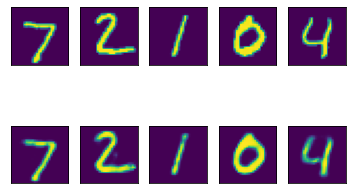

In [ ]:
autoencoder_outputs(autoencoder, 5, (28, 28))